In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [4]:
print(imagenet_stats)

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])


In [5]:
# path = Path('data/flowers-kaggle')
path = Path('C:\\Users\\ChooWilson\\dataset\\food-dataset')
bs = 30
# data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs, test = 'test')
# data = ImageDataBunch.from_folder(path, ds_tfms=None, size=224, bs=bs, valid_pct=0.2)
# data = ImageDataBunch.from_folder(path, ds_tfms=None, size=224, bs=bs, train='train', valid='test')
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs, train='train', valid='test')

data.normalize(imagenet_stats)
print(data.classes)

['laksa', 'nasi-briyani', 'nasi-lemak', 'roti-canai', 'satay']


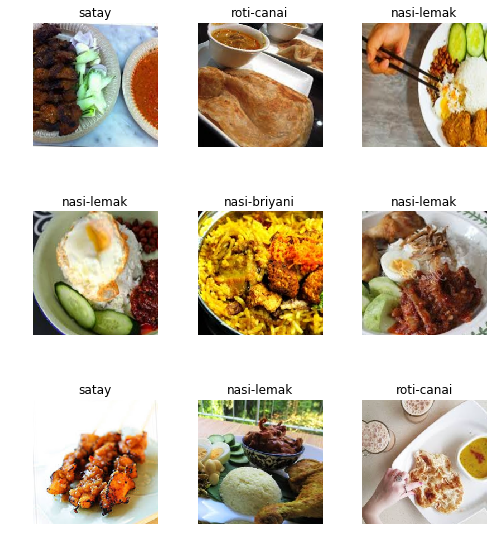

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['laksa', 'nasi-briyani', 'nasi-lemak', 'roti-canai', 'satay'], 5, 1350, 150)

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
# learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.807517,0.369765,0.120000,01:02
1,0.583053,0.343920,0.106667,00:54
2,0.386502,0.297877,0.093333,00:54
3,0.245963,0.268985,0.100000,00:52


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


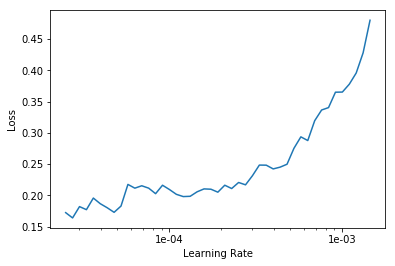

In [13]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
def get_test_class():
    preds = learn.get_preds(is_test=True)[0].numpy()
    label = np.argmax(preds)
    return data.classes[label]

In [ ]:
get_test